<a href="https://colab.research.google.com/github/akrautsky/ml-bootcamp/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Train linearSVC, SVC and SGDClassifier on the linear dataset


In [39]:
# Create the linear dataset
import numpy as np
import random
data1 = np.c_[np.random.normal(loc=5, scale=1.0, size=(500, 2)), np.ones([500, 1])]

In [64]:
data0 = np.c_[np.random.normal(loc=8, scale=1.0, size=(500, 2)), np.zeros([500, 1])]

In [65]:
data = np.concatenate( (data1, data0 ), axis=0)

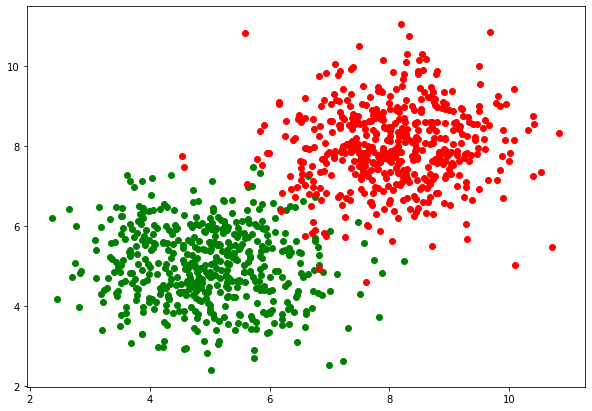

In [66]:
#lets plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter( data1[:, 0], data1[:, 1], c="green")
plt.scatter( data0[:, 0], data0[:, 1], c="red")
plt.show()


In [67]:
# split test and train datasets
X = data[:, :2]
y = data[:, 2:]

In [68]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Experiments 
  * LineavSVC
  * SVC
  * SGDClassifier


In [69]:

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [70]:
# linearSVC
lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [71]:
preds_lin_svc = lin_svc.predict(X_test)


In [72]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
preds_svc = svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
# SGDClassifier
sgd = SGDClassifier( )
sgd.fit(X_train, y_train)
preds_sgd = sgd.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
# lets compare the accuracy scores for all the models
from sklearn.metrics import accuracy_score
acc_lin = accuracy_score(y_test, preds_lin_svc.astype(int))
acc_svc = accuracy_score(y_test, preds_svc.astype(int))
acc_sgd = accuracy_score(y_test, preds_sgd.astype(int))


In [75]:
acc_lin, acc_svc, acc_sgd

(0.97, 0.97, 0.955)

In [125]:
# lets plot decision boundaries for each model
def plot_decision_boundary(model, data):

  x_min, x_max = min(data[:, 0]), max(data[:, 0])
  y_min, y_max = min(data[:, 1]), max(data[:, 1])

  xx, yy = np.meshgrid( np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100) )
  zz = np.c_[xx.ravel(), yy.ravel()]

  preds = model.predict(zz)
  preds = preds.reshape(xx.shape)

  plt.figure(figsize=(10,7))
  
  plt.contourf(xx, yy, preds)
  plt.colorbar()
  plt.plot()

  plt.scatter( data[:, 0], data[:, 1], c=data[:,2], cmap=plt.cm.OrRd)
 






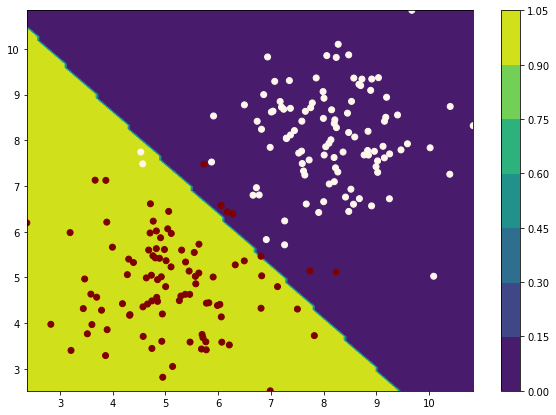

In [126]:
plot_decision_boundary(sgd, np.c_[X_test, y_test])

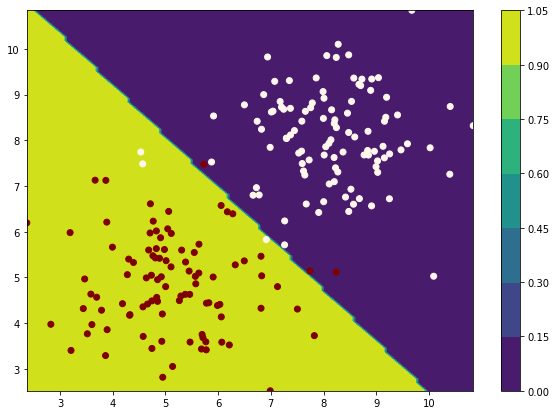

In [127]:
plot_decision_boundary(lin_svc, np.c_[X_test, y_test])

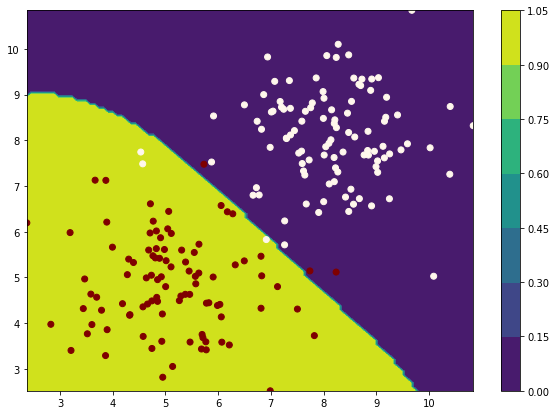

In [128]:
plot_decision_boundary(svc, np.c_[X_test, y_test])